# Coordination on Networks

"Coordination on Networks", C.Matthew Leister, Yves Zenou and Junjie Zhou, 2018, working paper

In [1]:
import networkx as nx
from itertools import chain, combinations
import matplotlib.pyplot as plt

## Algorithm 1

For disjoint agents sets $S$, $A \subseteq N$, $S \neq \emptyset$, define the function:

\begin{equation}
\psi(S|A) := \frac{v(S) + \phi(e(S,A) + e(S))}{|S|}
\end{equation}

Define $A_0 := \emptyset$. Step $k = 1, \cdots$ of the algorithm is defined as follows:

**Step k**

For $A \subset N$, define $\lambda(A) := \arg \max_{\emptyset \neq S \subseteq N \setminus A} \psi(S|A)$. Solve:

\begin{equation}
B_k = \cup_{S \in \lambda(A_{k-1})} S
\end{equation}

Partition $B_k$ into disjoint, connected subsets $\{ B_k^1, \cdots, B_k^{p(k)} \}$: $E_{B_k^s \cup B_k^{s'}} = E_{B_k^s} \cup E_{B_k^{s'}}$, $1 \le s < s' \le p(k)$. Set $A_k = B_k \cup A_{k-1}$.

Continue until $A_k = N$. Then $\{ \{ B_1^1, \cdots, B_1^{p(1)} \}, \{ B_2^1, \cdots, B_2^{p(2)} \}, \cdots \}$ gives $\mathcal{C}^*$.

In [2]:
#define the function phi(S|A)
#S and A are the list of nodes
def phi(G,S,A):
    if A == []: #if A is empty
        restricted_network = G.subgraph(S)
        phi = nx.number_of_edges(restricted_network)/nx.number_of_nodes(restricted_network)
        return phi
    else:
        network_S = G.subgraph(S)
        network_A = G.subgraph(A)
        S_and_A = []
        S_and_A += S
        S_and_A += A
        if S_and_A == list(set(S_and_A)): #Check whether S and A are disjoint
            restricted_network = G.subgraph(S_and_A)
            phi = (nx.number_of_edges(restricted_network) - nx.number_of_edges(network_S) - nx.number_of_edges(network_A) + nx.number_of_edges(network_S))/nx.number_of_nodes(network_S)
            return phi
        else:
            return 0 #If S and A are not disjoint, return 0

In [3]:
#return the power set
def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [4]:
#list in list -> list
def flatten(nested_list):
    return [e for inner_list in nested_list for e in inner_list]

In [5]:
#The return of this function is lambda(A) which is the set of 
#A is a list of nodes
def compute_lambda(G, A):
    node_list = list(G.nodes)
    for i in list(A):
        node_list.remove(i)
    restricted_graph = G.subgraph(node_list)
    max_set = []
    max_value = 0
    powerset_of_nodes = list(powerset(list(restricted_graph.nodes)))
    for i in powerset_of_nodes:
        if list(i) != []:
            phi_value = phi(G, list(i), A)
            if phi_value == max_value:
                max_set.append(list(i))
            elif phi_value > max_value:
                max_value = phi_value
                max_set.clear()
                max_set.append(list(i))
    return max_set #list

In [6]:
#main function
def main(G):
    partition_C = []
    A = []
    full_nodes = list(G.nodes)
    while A != full_nodes:
        Lambda = compute_lambda(G, A) #Lambda(A(k-1))
        coordination_set = list(set(flatten(Lambda)))
        partition_C.append(coordination_set)
        A = list(set(A)|set(coordination_set))
    return partition_C

In [7]:
#separate set of nodes into connected components
def partition(G, X):
    H = G.subgraph(X)
    components = [i for i in sorted(nx.connected_components(H))]
    return components

In [8]:
#Return the coordination sets
def coordination_set(G):
    coor = []
    for i in main(G):
        coor += partition(G,i)
    return coor

## Examples on papers

### Star Network

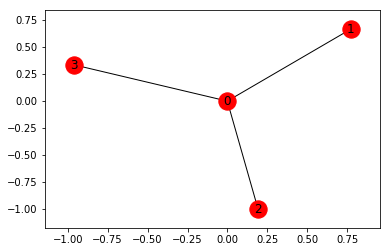

In [9]:
STAR = nx.star_graph(3)
nx.draw_networkx(STAR)
plt.show()

In [10]:
coordination_set(STAR)

[{0, 1, 2, 3}]

### Triad-core-periphery Network

In [11]:
TCP = nx.Graph()
TCP.add_nodes_from([0,1,2,3,4,5])
TCP.add_edges_from([(0,1),(1,2),(2,0),(0,3),(1,4),(2,5)])

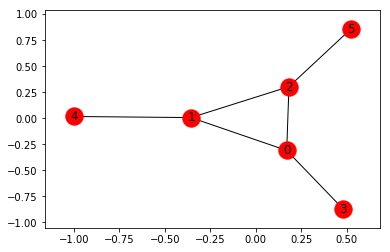

In [12]:
nx.draw_networkx(TCP)
plt.show()

In [13]:
coordination_set(TCP)

[{0, 1, 2, 3, 4, 5}]

### Quad-core-periphery Network

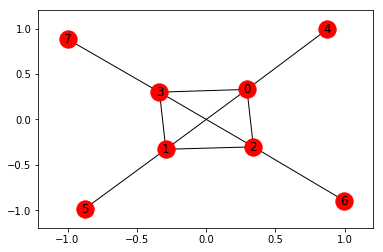

In [14]:
QCP = nx.Graph()
QCP.add_edges_from([(0,1),(1,2),(2,3),(3,0),(0,2),(1,3),(0,4),(1,5),(2,6),(3,7)])
nx.draw_networkx(QCP)
plt.show()

In [15]:
coordination_set(QCP)

[{0, 1, 2, 3}, {4}, {5}, {6}, {7}]

### Large Core-periphery Network

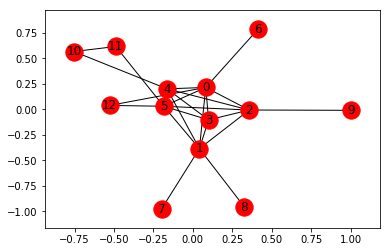

In [16]:
LCP = nx.complete_graph(6)
LCP.add_edges_from([(0,6),(1,7),(1,8),(2,9),(4,10),(5,11),(10,11),(5,12),(0,12)])
nx.draw_networkx(LCP)
plt.show()

In [17]:
coordination_set(LCP)

[{0, 1, 2, 3, 4, 5}, {6}, {7}, {8}, {9}, {10, 11}, {12}]

## Other Examples

### Florentine Family Graph

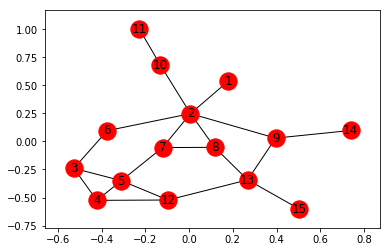

In [18]:
#Florentine Family Graph
F_Family = nx.Graph()
F_Family.add_edge(1, 2) #Acciaiuoli -> 1 #Medici -> 2
F_Family.add_edge(3, 4) #Castellani -> 3 #Peruzzi -> 4
F_Family.add_edge(3, 5) #Strozzi -> 5
F_Family.add_edge(3, 6) #Barbadori -> 6
F_Family.add_edge(2, 6)
F_Family.add_edge(2, 7) #Ridolfi -> 7
F_Family.add_edge(2, 8) #Tornabuoni -> 8
F_Family.add_edge(2, 9) #Albizzi -> 9
F_Family.add_edge(2, 10) #Salviati -> 10
F_Family.add_edge(10, 11) #Pazzi -> 11
F_Family.add_edge(4, 5) 
F_Family.add_edge(4, 12) #Bischeri -> 12
F_Family.add_edge(5, 7)
F_Family.add_edge(5, 12)
F_Family.add_edge(7, 8)
F_Family.add_edge(8, 13) #Guadagni -> 13
F_Family.add_edge(9, 14) #Ginori -> 14
F_Family.add_edge(9, 13)
F_Family.add_edge(12, 13)
F_Family.add_edge(13, 15) #Lamberteschi -> 15
nx.draw_networkx(F_Family)
plt.show()

In [19]:
coordination_set(F_Family)

[{2, 3, 4, 5, 6, 7, 8, 9, 12, 13}, {1}, {10, 11}, {14}, {15}]